In [1]:
###### Config #####
import sys, os, platform
if os.path.isdir("ds-assets"):
  !cd ds-assets && git pull
else:
  !git clone https://github.com/lutzhamel/ds-assets.git
colab = True if 'google.colab' in os.sys.modules else False
system = platform.system() # "Windows", "Linux", "Darwin"
home = "ds-assets/assets/"
sys.path.append(home)  

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 4 (delta 3), reused 4 (delta 3), pack-reused 0 (from 0)
Unpacking objects: 100% (4/4), done.
From https://github.com/lutzhamel/ds-assets
   7a9c24a..79b1319  main       -> origin/main
Updating 7a9c24a..79b1319
Fast-forward
 assets/dsutils.py | 4 ++++
 1 file changed, 4 insertions(+)


In [2]:
# notebook level imports
import pandas as pd
from sklearn import tree
from sklearn import metrics 
from sklearn import model_selection 
import seaborn as sns; sns.set_theme()

In [3]:
# format output from library calls
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})

# Evaluating Models

* You migh be wondering at this point why your models when left unrestricted
(max_depth=None) always get a perfect score or something close to it.

* Consider the iris data set.

In [4]:
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]

acc = tree\
   .DecisionTreeClassifier(max_depth=None)\
   .fit(X, y)\
   .score(X, y)

print(f"accuracy = {acc*100:.2f}%")

accuracy = 100.00%



* Turns out that this is a well known phenomenon in machine learning

* This can be characterized by **learning curves**.

## Learning Curves

* Learning curves illustrate the general trends of learners. 
* The **blue line** illustrates what will happen when we **train and test** the model
   with the **same data** (like we did above) - we call that the **training score**.
* The **red line** illustrates what will happen if we **test** our model with **separate
   data**, different from the training data - we call that the **testing score**.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/train-test-curves.png"  height="300" width="450">



* It can be shown that any model can learn its training data perfectly - “memorize it”. 
* Any model can achieve a perfect score on the training data as long as it is allowed to be complex enough. 
* That is what the blue curve shows above. 

BUT

* memorizing is not the same as learning inherent patterns
* Memorization is extremely bad at predicting labels for data that it hasn't seen yet.  
* Notice in the graph, models that have perfect training score perform poorly on the test data
* That is what the red curve above shows
* We say,

<center>

**Memorization does not generalize well!**

</center>


Simply put:

1. Undertrained models (low complexity models) make a lot of errors on test data because they have not learned any of the patterns yet.

2. Overtrained models (high complexity models) make a lot of errors on test data because memorization is extremely bad at predicting labels on data they haven't been trained on.

3. The best models make a trade-off between errors and recognizing important patterns. **Notice that for the best models the training score is not 100%!**



**Observation**: In order to find the **best model** we have to **search the model space** to find just the right complexity level. We 
control the model space via the appropriate parameter settings.

## Searching the Model Space

We will demonstrate the model search using decision trees with both the iris and wisconsin breast cancer datasets.

For each dataset we'll do the following:
1. We'll split the data into  training and testing partitions
2. Create trees from low complexity to high complexity
3. Train each of these model and test it (testing score)
4. We pick the model that has the **highest testing score**


### The Iris Dataset

* We start with the iris dataset.  
* We would expect a lower testing accuracy from both the low-complexity and high-complexity models compared to a medium-complexity model
* The medium-complexity model is most likely our best model.


In [5]:
df = pd.read_csv(home+"iris.csv")
XI  = df.drop(columns=['id','Species'])
yI = df[['Species']]

Create training and testing data partitions

In [6]:

# split the data - 70% training 30% testing
(XI_train, XI_test, yI_train, yI_test) = \
    model_selection.train_test_split(XI, 
                                     yI, 
                                     train_size=0.7, 
                                     test_size=0.3, 
                                     random_state=2)

We need to figure out how complex the max complexity tree is:

In [7]:
max_complexity = tree\
   .DecisionTreeClassifier(max_depth=None)\
   .fit(XI_train, yI_train)\
   .get_depth()


Let's set up a search over the complexity of trees,

In [8]:
for i in range(1,max_complexity+1):
    # build a model with appropriate complexity
    model = tree.DecisionTreeClassifier(max_depth=i).fit(XI_train, yI_train)
    # training score
    acc_train = model.score(XI_train, yI_train)
    # testing score
    acc_test = model.score(XI_test, yI_test)
    # print results
    print(f"max_depth={i}\
          train score={acc_train:.2f} \
          test score={acc_test:.2f}")


max_depth=1          train score=0.67           test score=0.67
max_depth=2          train score=0.96           test score=0.96
max_depth=3          train score=0.98           test score=0.98
max_depth=4          train score=1.00           test score=0.96


**Observation**: 
* From the list above, our best tree is a tree with **max_depth=3**. 
* It has the **highest test score**
* Also notice that the training and testing scores behave just as predicted by the 
   learning curves.

### Wisconsin Breast Cancer Dataset

Let's try this again with a slightly larger datasest. This data set is available at <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI</a>.
The data set describes benign and malignent tumors based on image measurements.

In [9]:
df = pd.read_csv(home+"wdbc.csv")
XW  = df.drop(columns=['ID','Diagnosis'])
yW = df[['Diagnosis']]

In [10]:
# split the data - 70% training 30% testing
(XW_train, XW_test, yW_train, yW_test) = \
    model_selection.train_test_split(XW, 
                                     yW, 
                                     train_size=0.7, 
                                     test_size=0.3, 
                                     random_state=2)

In [11]:
max_complexity = tree\
   .DecisionTreeClassifier(max_depth=None)\
   .fit(XW_train, yW_train)\
   .get_depth()

Searching for the best tree for the Wisconsin data.

In [12]:
for i in range(1,max_complexity+1):
    # build a model with appropriate complexity
    model = tree\
        .DecisionTreeClassifier(max_depth=i,random_state=3)\
        .fit(XW_train, yW_train)
    # training score
    acc_train = model.score(XW_train, yW_train)
    # testing score
    acc_test = model.score(XW_test, yW_test)
    # print results
    print(f"max_depth={i}\
          train score={acc_train:.2f} \
          test score={acc_test:.2f}")


max_depth=1          train score=0.93           test score=0.90
max_depth=2          train score=0.96           test score=0.91
max_depth=3          train score=0.97           test score=0.93
max_depth=4          train score=0.99           test score=0.95
max_depth=5          train score=1.00           test score=0.94
max_depth=6          train score=1.00           test score=0.92


**Observation**:
* Our best model is a tree with **max_depth=4**
* It has the **highest test score**
* Again, the training and testing scores behave just as predicted by the 
   learning curves.

## Automating the Search: The Grid Search

* As we saw above, the only way to find the best model for a particular dataset is to search for it by trying different parameters that control the complexity of the models.  
* **Model complexity is often governed by more than one parameter**, therefore
* The model search is usually referred to as the **grid search**.
* The **sklearn GridSearchCV** function automates the model search



### Grid Search with sklearn

* Sklearn has a built-in grid search that searches the models space and 
   returns the **best model**
* In our case the decision tree classifiers are governed by max_depth. 



### Iris Data
Grid search for best model for iris data:

In [13]:
# setting up grid search
depth_ceiling = tree\
    .DecisionTreeClassifier(max_depth=None)\
    .fit(XI_train, yI_train)\
    .get_depth()
model = tree.DecisionTreeClassifier(random_state=3)
param = {
   'max_depth': list(range(1,depth_ceiling+1))
   }              
best_model = model_selection\
    .GridSearchCV(model, param)\
    .fit(XI_train,yI_train)

Evaluate the best model.

In [14]:
# compute the accuracy of optimal classifier
acc = best_model.score(XI_test,yI_test)
depth = best_model.best_estimator_.get_depth()
print(f"Depth={depth} \t Testing Score={acc:3.2f}")

Depth=3 	 Testing Score=0.98


### Wisconsin Data

Grid search for best model for wisconsin data

In [15]:
# setting up grid search
depth_ceiling = tree\
    .DecisionTreeClassifier(max_depth=None)\
    .fit(XW_train, yW_train)\
    .get_depth()
model = tree.DecisionTreeClassifier(random_state=3)
param = {
    'max_depth': list(range(1,depth_ceiling+1)),               
    }
best_model = model_selection\
    .GridSearchCV(model, param)\
    .fit(XW_train,yW_train)

Evaluate the best model.

In [16]:
# compute the accuracy of optimal classifier
acc = best_model.score(XW_test,yW_test)
depth = best_model.best_estimator_.get_depth()
print(f"Depth={depth} \t Testing Score={acc:3.2f}")

Depth=5 	 Testing Score=0.94


## The Refit Score

* Sklearn's grid search function performs its **own internal train-test split** in order to search for the best model
* That means there is no need for us to perform a manual train-test split
* We can simply use the whole data set in the search
* This will make our search much simpler

Question:

* How do we evaluate the model if we used the whole data set for model searching?

Answer:

* We use the **whole data set for evaluation**
* This is known as **refit**
* The score we obtain is called the **refit score**

Observation:

* **There is no danger of overfitting because the grid search performed internal
   train-test splits**
* We will later develop the tools to demonstrate that the refit score is
   statistically the same as a formal train-test evaluation

Let's take a look.

In [17]:
# fitting the model to the entire dataset
depth_ceiling = tree.DecisionTreeClassifier(max_depth=None)\
   .fit(XI, yI)\
   .get_depth() # get the maximum depth of the tree for the dataset
model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,depth_ceiling+1))              
    }
best_model = model_selection\
   .GridSearchCV(model, param_grid)\
   .fit(XI,yI)

In [18]:
# evaluate the best model
acc = best_model.score(XI,yI)
depth = best_model.best_estimator_.get_depth()
print(f"Depth={depth} \t Accuracy={acc:3.2f}")

Depth=4 	 Accuracy=0.99


## Cross Validation

### Issues with Train and Test

* Train-testing relies on randomly splitting the training data into two parts.

* If this split just happens to be a 'bad' split our results might be biased.

Consider the following code where we randomly split the data repeatedly and train and test on the resulting partitions.  We plot the accuracies.

<Axes: ylabel='Count'>

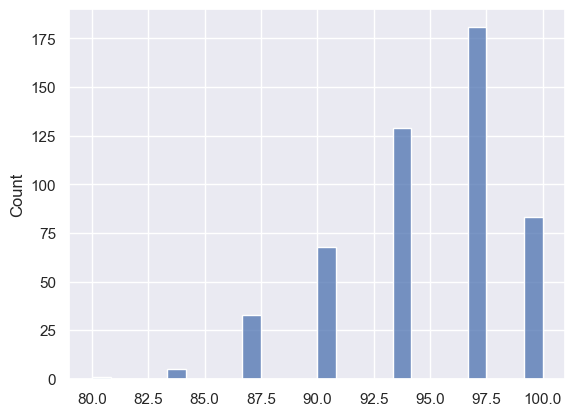

In [19]:
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]
acc_list = []
for i in range(500):
    (X_train, X_test, y_train, y_test) = \
        model_selection.train_test_split(X, 
                                        y, 
                                        train_size=0.8, 
                                        test_size=0.2,
                                        shuffle=True) 
    # we limit the complexity of the trees
    model = tree.DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)
    acc_list.append(model.score(X_test,y_test)*100)

sns.histplot(acc_list)

* We plotted the accuracies as a histogram where can see the distibution of accuracy values.

* Note the range of possible resulting accuracies. Extremely good and extremely poor performances are simply a function of the random split.

In cross-validation we perform two trials (model constructions) where, in each trial, we switch the roles of our two sets (see the figure below).  In order to evaluate the model performance in cross-validation, we build and evaluate a model in each trial and then take the average performance between the two models as the performance of the cross-validation.  Notice that this will mitigate the 'bad' split issue mentioned above.

**Note**: In cross-validation the testing set is called the **validation set**.



<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/2fold-xval.png" height="400" width="450">


But we are still only dealing with a single split that might be bad.

## N-Fold Cross-Validation

Here we do the following:
* perform the split N times,
* then train and test on each fold,
* take the average of the model performance over the folds in order to determine the **cross-validated model performance**

Example:
* 5-fold cross-validation - split the training data into 5 partitions (folds)
* Use each fold as a test/validation set and the other folds as training set
* Multiple splits - even if one is bad it will be balanced out by the others.

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/5fold-xval.png" height="400" width="450">

**Note**: 5-fold cross-validation is interesting because each trial essentially has an 80-20 split: 80% of the data for training and 20% for testing.  This is one of the more common ways to split a dataset into training and testing sets.

**Note**: 
* We have to train and test models five times in 5-fold cross-validation.
* This exactly what GridSearchCV does by default.

# Model Accuracy Reexamined

The accuracy score for classifiers we have been looking at so far is a good first look at the 
performance of a classifier.  However, for sensitive classification tasks like biomedical applications
we would like to understand the errors a classifier makes a little bit better.

Consider a classification problem with two classes, then we can observe the following outcomes of a prediction of a classification model:

>**true positive (TP)** -- predicted positive coincides with actual positive
>
>**true negative (TN)** -- predicted negative coincides with actual negative
>
>**false positive (FP)** -- predicted positive but actual negative (Type I error)
>
>**false negative (FN)** -- predicted negative but actual positive (Type II error)
>

**Observation**: Two types of errors possible!

The distinction between these two types of errors is extremely important.  Consider a biomedical diagnostic
decision model predicting the presence of a disease.  A false positive tends to not be problematic in this context because it will simply lead to more tests until it is discovered that the model make a false positive prediction.  The false negative prediction is much more troublesome; the patient is told to be disease free when in fact they are not.  Therefore, practitioners who build models for these kind of sensitive applications try to minimize false negative predictions of the models as much as possible.


### The Confusion Matrix

An easy way to visualize the four outcomes of a binary decision model is the **confusion matrix**.
* We can arrange the predictions in a matrix form
* Errors will show up as values outside the major diagonal

<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/confusion2.png" height="200" width="250">

## The Wisconsin Breast Cancer Data Set

Let's look at the performance of a tree model for the Wisconsin Breast Cancer Dataset using a confusion matrix.  We will evaluate the optimal tree model for this dataset.

In [20]:
# get data
df = pd.read_csv(home+"wdbc.csv")
X  = df.drop(columns=['ID','Diagnosis'])
y = df[['Diagnosis']]

In [21]:
depth_ceiling = tree.DecisionTreeClassifier().fit(X,y).get_depth()
model = tree.DecisionTreeClassifier(random_state=1)
param = {
    'max_depth': list(range(1,depth_ceiling+1)),
    'criterion': ['gini','entropy']
    }
best_model = model_selection\
    .GridSearchCV(model,param)\
    .fit(X,y)


In [22]:
print(f"accuracy={best_model.score(X,y):.2f}")

accuracy=0.98


**Observation**: Here we take advantage of the fact that GridSearchCV can search over **multiple model parameters**.  Here, this makes a difference!

In [23]:
# M label top-left corner
# we want the malignent tumor prediction to be our "positive"
labels = [
   'M', # Malignant - positive
   'B'  # Benign - negative
   ]

# create predicted values for target
predict_y = best_model.predict(X)

# build the confusion matrix
cm = metrics.confusion_matrix(y,             # observed target values (rows)
                              predict_y,     # predicted target values (columns)
                              labels=labels) # labels for arranging the cm

# cm is just an array of values, turn it into something readable
cm_df = pd.DataFrame(cm, 
                     index=labels, 
                     columns=labels)

cm_df

,M,B
M,210,2
B,7,350


We see that most of the instances lie on the major diagonal, that means the model predicted those instances correctly.  On the top line we also see that the model had **2 false negatives** (predicted malignant as benign) and on the bottom line it had **7 false positives** (predicted benign as malignant).



Let's interpret this matrix in more detail.  Summing accross the rows gives us the observed target values.

* M: $210+2=212$
* B: $7+350=357$

Notice that this coincides precisely with the label counts in our data,

In [24]:
df[['Diagnosis']].value_counts()

Diagnosis
B            357
M            212
Name: count, dtype: int64

This is an easy way to check that you set up your confusion matrix correcty!

## The Iris Data Set

Here we are building a **three way confusion matrix** because we have three classification labels.  We apply our grid search to find the best model

In [25]:
# get data
df = pd.read_csv(home+"iris.csv")
X  = df.drop(columns=['id','Species'])
y = df[['Species']]


In [26]:

depth_ceiling = tree.DecisionTreeClassifier().fit(X,y).get_depth()
model = model = tree.DecisionTreeClassifier(random_state=1)
param = {
    'max_depth': list(range(1,depth_ceiling+1))
    }
best_model = model_selection\
    .GridSearchCV(model,param)\
    .fit(X,y)

In [27]:
# build and print the confusion matrix
labels = ['setosa','versicolor','virginica'] # labels in alphabetic order

predict_y = best_model.predict(X)
cm = metrics.confusion_matrix(y,         # observed
                              predict_y, # predicted
                              labels=labels)
cm_df = pd.DataFrame(cm, 
                     index=labels, 
                     columns=labels)
cm_df

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,50,0
virginica,0,1,49


In a three-way confusion matrix we usually do not talk about false positives or negatives.  We just **look for misclassifications and try to characterize them**.  In our case the model makes one mistake and misclassifies a single instance of virginica as a versicolor flower.

# Reading

5.3 [Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)